# Рынок общественного питания Москвы<a class="tocSkip">

Презентация 2: https://drive.google.com/file/d/1iroWxer9_Yw26wQF-tSR4mxcccdpRsH_/view?usp=sharing

#### Оглавление <a class="tocSkip">
* [Импорт библиотек](#first-bullet)
* [1. Открытие данных](#second-bullet)
* [2. Исследовательский анализ](#1-bullet)
* [Общий вывод](#2-bullet)

#### Импорт библиотек <a class="anchor" id='first-bullet'></a><a class="tocSkip">

In [147]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
from plotly import graph_objects as go
import plotly.express as px
import string
%matplotlib inline
from io import BytesIO
import requests
import warnings
warnings.filterwarnings("ignore")


#### 1. Открытие данных <a class="anchor" id='second-bullet'></a><a class="tocSkip">

In [148]:
rest_data=pd.read_csv('/datasets/rest_data.csv')

In [149]:
display(rest_data.tail(2))

,id,object_name,chain,object_type,address,number
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10


In [150]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [151]:
print(rest_data.duplicated().sum())

0


Данные заполнены, дубликатов не обнаружено.

### 2. Исследовательский анализ данных <a class='anchor' id='1-bullet'></a><a class="tocSkip">

##### 2.1 Соотношение видов общественного питания<a class="tocSkip">

In [152]:
rest_data_pie=rest_data.groupby('object_type')['number'].count().rename('count')
rest_data_pie=rest_data_pie.sort_values().reset_index()

In [153]:

data = px.data.election()
fig = px.bar(rest_data_pie, x='object_type', y='count', title='Соотношение видов объектов общественного питания по количеству')
fig.update_xaxes(tickangle=45)
fig.show()

Самый распространенный тип заведения- кафе. Немного меньше столовая, ресторан и предприятия быстрого обслуживания.


##### 2.2 Соотношение сетевых и несетевых видов общественного питания<a class="tocSkip">

In [154]:
rest_data_pie_0=rest_data.groupby('chain')['number'].count().reset_index()
name_rest = ['Сетевые заведения', 'Несетевые заведения']

fig=go.Figure(data=[go.Pie(labels=name_rest , values=rest_data_pie_0['number'])])

fig.show()

Больше 80 % заведений Москвы являются несетевыми.

##### 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?<a class="tocSkip">

In [155]:
rest_data_pie_2=rest_data.query('chain=="да"').groupby(['object_type','chain'])['number'].count().rename('count').reset_index()
rest_data_pie_2_01=rest_data.query('chain=="нет"').groupby(['object_type','chain'])['number'].count().rename('count_y').reset_index()
rest_data_pie_2=rest_data_pie_2.merge(rest_data_pie_2_01, on='object_type')
rest_data_pie_2['share, %']=(rest_data_pie_2['count']/(rest_data_pie_2['count']+rest_data_pie_2['count_y']))*100

print(rest_data_pie_2.head())

  object_type chain_x  count chain_y  count_y   share, %
0         бар      да     37     нет      819   4.322430
1       буфет      да     11     нет      574   1.880342
2  закусочная      да     56     нет      304  15.555556
3        кафе      да   1396     нет     4703  22.888998
4   кафетерий      да     52     нет      346  13.065327


In [156]:
fig=px.bar(rest_data_pie_2, x='object_type',y='share, %', title='Соотношение видов объектов общественного питания по количеству в заведениях с сетевым распределением')
fig.show()

 
Самые большая доля организаций   имеющие сетевое распространение у предприятий быстрого обслуживания (более 40%).

##### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?<a class="tocSkip">

Text(0.5, 1.0, 'Распределение количества посадочных мест')

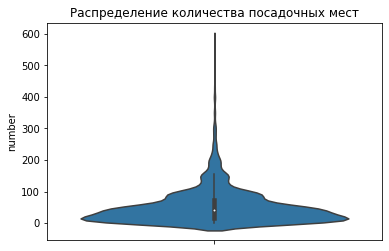

In [157]:
rest_data_chain=rest_data[(rest_data['chain']=='да')]
sns.violinplot(y='number',data=rest_data_chain)
plt.title('Распределение количества посадочных мест')


Мы определили, что верхняя граница ящика с усами находится на отметке 300 посадочных мест.

In [158]:
rest_data_chain['object_name']=rest_data_chain['object_name'].str.lower() # в этом блоке укрупнила группы из-за неодинаковых названий в таблице одних и тех же сетей.

rest_data_chain['object_name']=rest_data_chain['object_name'].replace("«",'')
rest_data_chain['object_name']=rest_data_chain['object_name'].replace("»",'')
rest_data_chain['object_name']=rest_data_chain['object_name'].replace("-",'')
def str_object(row):
    object_name=row['object_name']
    if ('теремок') in object_name:
        return 'теремок'
    if ('starbucks' or 'старбакс') in object_name:
        return 'старбакс'
    if 'якитория' in object_name:
        return 'якитория'
    else:
        return object_name
rest_data_chain['object_name']=rest_data_chain.apply(str_object, axis=1)
rest_data_chain_nomber=rest_data_chain.groupby('object_name').agg({'id':'count','number':'mean'}).reset_index()
rest_data_chain_nomber.set_axis(['object_name','count_object','number'], axis='columns',inplace=True)

top_object_name=rest_data_chain_nomber.query('count_object>70')
print(top_object_name['count_object'].sum())
print(rest_data_chain_nomber['count_object'].sum())

1035
2968


In [159]:
fig=px.bar(top_object_name, x='object_name',y='number', title='Среднее количество посадочных мест у больших сетей')
fig.show()

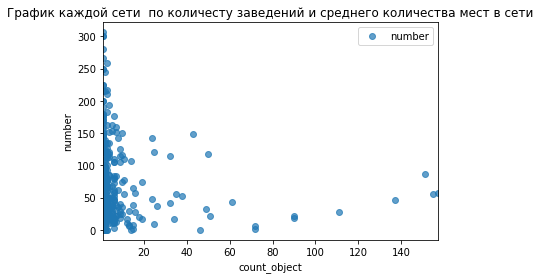

In [160]:
rest_data_chain_nomber.plot(x='count_object', y='number', style='o', alpha=0.7)#,figsize=(15,9))
plt.title('График каждой сети  по количесту заведений и среднего количества мест в сети')
ax = plt.gca()

ax.set_ylabel('number')
plt.show()
#ax.set_ylabel('number')
plt.show()

    
Нельзя дать определенного вывода , что характерно для сетевых заведений. Есть много сетей, которые в Москве имеют всего одно заведение (в таких количество мест варьируется от нуля до 300 посадочных мест) . В сетях с большим количеством заведений в Москве , среднее количество посадочных мест  в зависемости от сети тоже разное . В макдоналсе среднее количество больше 80, в милти близко к нулю.

##### 2.5 Cреднее количество посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест? <a class="tocSkip">

In [161]:
rest_data_now=rest_data
rest_data_mean=rest_data_now.groupby('object_type').agg({'number':'median'}).reset_index()
display(rest_data_mean)

,object_type,number
0,бар,35
1,буфет,32
2,закусочная,0
3,кафе,30
4,кафетерий,6
5,магазин (отдел кулинарии),0
6,предприятие быстрого обслуживания,5
7,ресторан,80
8,столовая,103


In [162]:
fig=px.bar(rest_data_mean, x='object_type', y='number', title='Среднее количество мест по типу заведения')
fig.show()

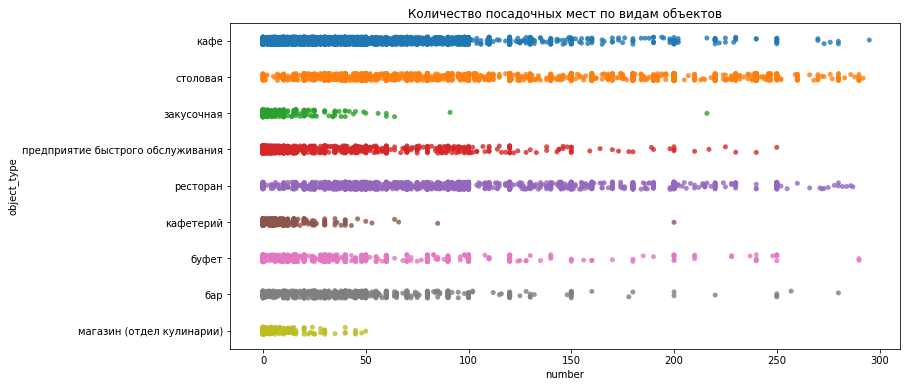

In [163]:
rest_data_now__01=rest_data[rest_data['number']<300]# тут оставила ограничения , чтобы график был читаемым
fig, test=plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)
sns.stripplot(x='number', y='object_type', data=rest_data_now__01, alpha=0.8).set_title('Количество посадочных мест по видам объектов')
fig.show()

Самое большое количество посадочных мест обычно в столовых. Чуть меньше среднее количество в ресторанах.Остальные типы заведений имеют среднее значение меньше 40.

In [164]:
rest_data['street']=rest_data['address'].str.extract('(([А-я0-9ё\-\s]+)?(улица|переулок|проспект|шоссе|набережная|проезд|площадь|бульвар|аллея|квартал|линия|микрорайон|Зеленоград|поселение|деревня|километр|просек|тупик|территория|посёлок)([0-9А-яё\-\s]+)?)')[0].str.strip()
rest_data['№']=rest_data['address'].str.extract('(дом+([0-9А-яё\-\s]+))')[0].str.strip()
rest_data['№']=rest_data['№'].str.extract('(([0-9ё\-\s]+))')[0].str.strip()
display(rest_data.tail())

,id,object_name,chain,object_type,address,number,street,№
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок,18
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,33
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,33
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский,4
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,4


Выделила название улицы в отдельный столбик. Если адрес не относится к Москве , то виделила название населенного пункта

Для определения района города, мы будем испотльзовать данные с МОСГАЗА.

In [165]:

spreadsheet_id = '1XMZuZP1Ncji4j-0W-v1TsFNp3ex4NJPvD0fAbTVRNao'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,"streetname,areaid,okrug,area"
0,"Выставочный переулок,17,ЦАО,Пресненский район"
1,"улица Гашека,17,ЦАО,Пресненский район"
2,"Большая Никитская улица,17,ЦАО,Пресненский район"
3,"Глубокий переулок,17,ЦАО,Пресненский район"
4,"Большой Гнездниковский переулок,17,ЦАО,Преснен..."


Данные расположены в одном столбце , разделим данные на столбцы 

In [166]:
new_df=df['streetname,areaid,okrug,area'].str.split(',', expand=True)

new_df.set_axis(['street','№','areaid','area','0'], axis='columns',inplace=True)
display(new_df[new_df['0'].isna()==False].head())
new_df_01=new_df[['street','areaid','№']]
new_df=new_df[['street','areaid']]
display(new_df.head())


,street,№,areaid,area,0
713,МКАД,100-й километр,25,ВАО,Район Гольяново
714,МКАД,101-й километр,25,ВАО,Район Гольяново
715,МКАД,102-й километр,25,ВАО,Район Гольяново
716,МКАД,103-й километр,25,ВАО,Район Гольяново
718,МКАД,104-й километр,25,ВАО,Район Гольяново


,street,areaid
0,Выставочный переулок,ЦАО
1,улица Гашека,ЦАО
2,Большая Никитская улица,ЦАО
3,Глубокий переулок,ЦАО
4,Большой Гнездниковский переулок,ЦАО


Часть таблицы сформировалась неккоректно, в строках , где присутствовало 4 запятые , вместо 3 добавился лишний столбик. Поскольку это произошло в основном с данным по киллометрам по Мкаду -это не повредит дальнейшему анализу.

In [167]:
new_df_CAO=new_df[new_df['areaid']=='ЦАО'] # сформировали таблицу , где есть только ЦАО
new_df_other=new_df[new_df['areaid']!='ЦАО'].drop_duplicates(subset='street')# таблица где все остальное
combo_new_df=pd.concat([new_df_CAO,new_df_other], axis=0).drop_duplicates(subset='street', keep='first')# сформировали таблицу без дубликатов по улицам, чтобы потом объединить данные
display(new_df_CAO.head(2))
display(combo_new_df.tail(2))
rest_data=rest_data.merge(combo_new_df, on='street', how='left')# все объединили
rest_data.info()

,street,areaid
0,Выставочный переулок,ЦАО
1,улица Гашека,ЦАО


,street,areaid
4151,Южнобутовская улица,ЮЗАО
4152,Народный переулок,ЮЗАО


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 9 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
street         15366 non-null object
№              14917 non-null object
areaid         14680 non-null object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


Создала таблицу по данным Мозгаза , которая делит улицы по областям. Поскольку одна улица может принадлещать сразу нескольким районам , сформировала таблицу по принципу : если часть улицы прнадлежит к ЦАО, то значение округа улицы будет ЦАО, если улица проходит сразу через несколько областей и среди них нет ЦАО, то берется один случайный округ в который она попала.

Какие-то из округов остались незаполнеными. Посмотрим какие значения.

In [168]:
display(rest_data[rest_data['areaid'].isna()].tail())
rest_data['areaid']=np.where(rest_data['areaid']=='47','Район Тропарево-Никулино', rest_data['areaid'])# сформировалась ошибка из-за деления таблица на 5 столбцов , вместо 4. Заменила одно значение руками
display(rest_data['areaid'].value_counts())

,id,object_name,chain,object_type,address,number,street,№,areaid
15261,211227,Милти,да,предприятие быстрого обслуживания,"город Москва, поселение Внуковское, улица Лётч...",0,поселение Внуковское,5,NaN
15309,212713,Burger Club,да,кафе,"город Москва, поселение Воскресенское, Чечёрск...",6,поселение Воскресенское,51,NaN
15327,210815,Милти,да,предприятие быстрого обслуживания,"город Москва, город Московский, улица Хабарова...",0,улица Хабарова,2,NaN
15342,210776,Мята Lounge,да,ресторан,"город Москва, город Московский, улица Хабарова...",50,улица Хабарова,2,NaN
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский,4,NaN


ЦАО                         4865
ЮАО                         1938
САО                         1347
ВАО                         1261
ЗАО                         1260
СВАО                        1134
ЮЗАО                         905
ЮВАО                         849
СЗАО                         723
Зеленоград                   361
Район Тропарево-Никулино      37
Name: areaid, dtype: int64

Не подхватились поселения и города рядом с Москвой , не входившие в данные Мосгаза. Создам округ 'Другое' ,  которым заполню пропущенные значения.

In [169]:
rest_data['areaid']=rest_data['areaid'].fillna('Другое')
display(rest_data.tail(2))
rest_data.info()
display(rest_data['areaid'].value_counts())

,id,object_name,chain,object_type,address,number,street,№,areaid
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский,4,Другое
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,4,САО


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 9 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
street         15366 non-null object
№              14917 non-null object
areaid         15366 non-null object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


ЦАО                         4865
ЮАО                         1938
САО                         1347
ВАО                         1261
ЗАО                         1260
СВАО                        1134
ЮЗАО                         905
ЮВАО                         849
СЗАО                         723
Другое                       686
Зеленоград                   361
Район Тропарево-Никулино      37
Name: areaid, dtype: int64

Теперь все данные заполнили , можно произвести анализ

#####  2.6 Топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?<a class="tocSkip">

In [170]:
rest_data_01=rest_data.merge(new_df_01, on=['street','№'])
display(rest_data_01.head())
print(len(rest_data_01))
display(rest_data.head())
print(len(rest_data))

,id,object_name,chain,object_type,address,number,street,№,areaid_x,areaid_y
0,143094,Кальянный клуб Дымок Уголек,нет,кафе,"город Москва, Татарская улица, дом 14",30,Татарская улица,14,ЦАО,ЦАО
1,59356,Шоколадница,да,кафе,"город Москва, Тверская улица, дом 19",48,Тверская улица,19,ЦАО,ЦАО
2,127915,Прайм,да,кафе,"город Москва, Тверская улица, дом 19А",41,Тверская улица,19,ЦАО,ЦАО
3,159277,Кофе Хаус,да,кафе,"город Москва, Тверская улица, дом 19А",96,Тверская улица,19,ЦАО,ЦАО
4,137745,Lion's head Pub,нет,ресторан,"город Москва, Мясницкая улица, дом 15",158,Мясницкая улица,15,ЦАО,ЦАО


204


,id,object_name,chain,object_type,address,number,street,№,areaid
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,9,СВАО
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,2,ЦАО
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,6,ЦАО
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,1,СВАО
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,9,СВАО


15366


Если улица проходит через несколько округов , то количество заведений на этой улице поделила по этим округам равными долями. Точное деление по округам сделать нельзя .
    График ниже

In [171]:
new_df=new_df.drop_duplicates()
new_df_count=new_df.groupby('street')['areaid'].count().rename('count_areaid').reset_index()
rest_data_01=rest_data[['street','number']]


street_top10_areaid_dop=rest_data_01.merge(new_df,on='street')
street_top10_areaid_dop=street_top10_areaid_dop.merge(new_df_count, on='street')

street_top10_areaid_dop=street_top10_areaid_dop[(street_top10_areaid_dop['street']!='город Зеленоград')&(street_top10_areaid_dop['street']!='поселение Сосенское')].groupby(['street','areaid']).agg({'number':'count','count_areaid':'mean'})

street_top10_areaid_dop=street_top10_areaid_dop.reset_index()
street_top10_areaid_dop['count']=street_top10_areaid_dop['number']/street_top10_areaid_dop['count_areaid']
street_top10_areaid_dop=street_top10_areaid_dop.query('number>108').sort_values(by='count',ascending=False)

fig=px.bar(street_top10_areaid_dop,x='street', y='count', color='areaid', title='Топ-10 улиц по количеству заведений')
fig.show()

Больше всего заведений находится на проспекте Мира, находящаяся  в центральном Районе и в районе СВАО.

In [172]:
fig=px.bar(street_top10_areaid_dop,x='street', y='number', color='areaid', title='Топ-10 улиц по количеству заведений')
fig.show()

In [173]:
display(street_top10_areaid_dop[['street','areaid']])

,street,areaid
1011,Профсоюзная улица,ЮЗАО
682,Ленинградский проспект,САО
996,Пресненская набережная,ЦАО
673,Кутузовский проспект,ЗАО
597,Каширское шоссе,ЮАО
602,Кировоградская улица,ЮАО
1418,проспект Мира,СВАО
1419,проспект Мира,ЦАО
391,Варшавское шоссе,ЮАО
392,Варшавское шоссе,ЮЗАО


In [174]:
street_top10_areaid1=street_top10_areaid_dop.groupby('areaid')['count'].sum().reset_index()
display(street_top10_areaid1)
name=['ЗАО','САО','СВАО','ЦАО','ЮАО','ЮЗАО']
fig=go.Figure(data=[go.Pie(labels=name, values=street_top10_areaid1['count'])])

fig.show()

,areaid,count
0,ЗАО,217.0
1,САО,173.0
2,СВАО,102.0
3,ЦАО,306.0
4,ЮАО,341.0
5,ЮЗАО,368.0


Большая часть заведений находится в ЦАО.

##### 2.7 Число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?<a class="tocSkip">

In [175]:
street_top10_areaid_object_type=rest_data[(rest_data['areaid']!='Зеленоград')&(rest_data['street']!='поселение Сосенское')].groupby(['object_name','areaid'])['street'].nunique().rename('nunique')
street_top10_areaid_object_type=street_top10_areaid_object_type.reset_index().sort_values(by='nunique',ascending=False)
street_top10_areaid_object_type__01=street_top10_areaid_object_type.groupby('object_name')['nunique'].sum().rename('sum').reset_index().sort_values(by='sum', ascending=False).head(10)

street_top10_areaid_object_type=street_top10_areaid_object_type.merge(street_top10_areaid_object_type__01, on='object_name')



In [176]:
fig=px.bar(street_top10_areaid_object_type,x='object_name', y='nunique', color='areaid', title='Количество улиц по основным объектам')
fig.show()

Мы рассмотрели основные большие заведения. И можно сказать , что каждая большая сеть  имеет свое заведение в каждом районе города. Большая часть заведений всегда распологается в центре.

In [177]:

rest_data_one_object=rest_data.groupby(['street','areaid'])['object_name'].count().rename('count_object').reset_index()
rest_data_one_object=rest_data_one_object[(rest_data_one_object['count_object']==1)&(rest_data_one_object['areaid']!='Другое')&(rest_data_one_object['areaid']!='Зеленоград') ].groupby('areaid')['count_object'].sum().rename('count_object').reset_index()
fig=px.bar(rest_data_one_object,x='areaid', y='count_object', title='Количество улиц по округам с одним объектом общественного питания')
fig.show()


    В каждом округе есть много улиц с всего одним заведением общественного питания . Больше всего также в ЦАО.

##### 2.8 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?<a class="tocSkip">

72.49386162932817


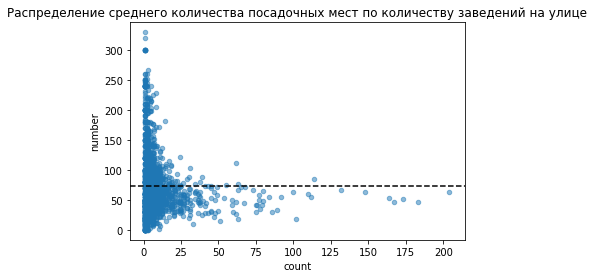

<Figure size 1080x648 with 0 Axes>

In [178]:
rest_data_number=rest_data[(rest_data['areaid']!='Зеленоград')&(rest_data['areaid']!='Другое')].groupby('street').agg({'id':'count','number':'mean'}).reset_index()
rest_data_number.set_axis(['street','count','number'], axis='columns',inplace=True)
rest_data_number2=rest_data_number.groupby('count')['number'].mean().reset_index()

rest_data_number2=rest_data_number.sort_values(by='count', ascending=False).plot(kind='scatter', x='count',y='number', alpha=0.5)
plt.title('Распределение среднего количества посадочных мест по количеству заведений на улице')
plt.axhline(y=72.49, color='black', linestyle='--')
plt.figure(figsize=(15,9))

print(rest_data_number['number'].mean())



При изучении распределения среднего количества посадочных мест на улице и количества заведений на улице, мы выявили, что чем больше на улице заведений, тем ближе к среднему по Москве количество посадочных мест.  

In [179]:
rest_data_number=rest_data[(rest_data['areaid']!='Зеленоград')&(rest_data['areaid']!='Другое')]
rest_count=rest_data_number.groupby('street')['id'].count().rename('count').reset_index()
rest_data_number=rest_data_number.merge(rest_count, on='street')
display(rest_data_number.head())


,id,object_name,chain,object_type,address,number,street,№,areaid,count
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,9,СВАО,3
1,193477,Grill-House,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,14,СВАО,3
2,196756,Пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,14,СВАО,3
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,2,ЦАО,9
4,83942,Кафе Даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,31,ЦАО,9


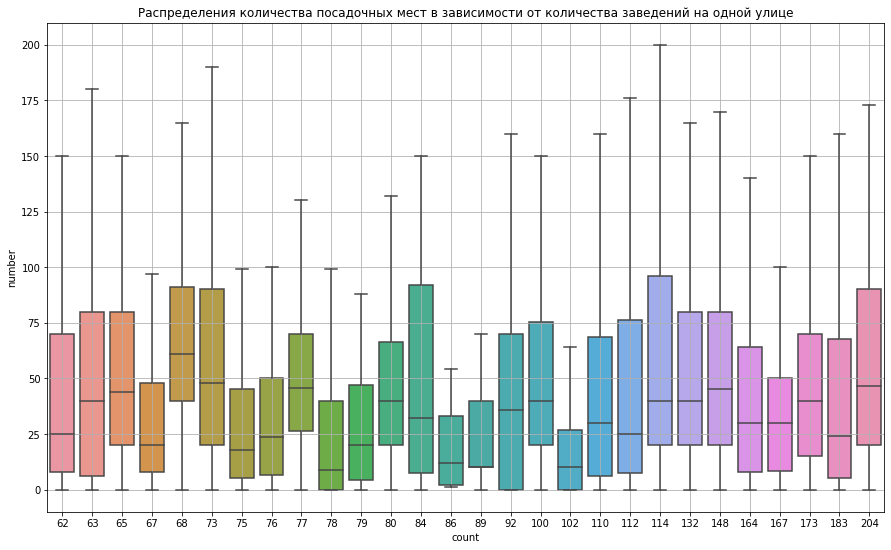

In [180]:
rest_data_number_group=rest_data_number.groupby('count')['address'].count().reset_index()
rest_data_number_group=rest_data_number_group.query('count>60')

plt.figure(figsize=(15,9))
plt.title('Распределения количества посадочных мест в зависимости от количества заведений на одной улице')
sns.boxplot(x='count',y='number',data=rest_data_number, showfliers=False, order=rest_data_number_group['count'].to_list())
plt.grid(True)

plt.show()


Мы построили распределения количества посадочных мест с разделением по количеству заведений на одной улице. При большем количестве заведений на одной улице среднее количество посадочных мест остается примерно на одном уровне.


#### Общий вывод <a class='anchor' id='2-bullet'></a><a class="tocSkip">

Кафе-самый распространенный тип заведения. Больше 80 % заведений Москвы являются несетевыми. Оставшиеся 20% сетевых заведений являются в основном рестораны , кафе и предприятия быстрого обслуживания. В большинстве случаев сетевые заведения имеют меньше 40 посадочных мест. Больше всего заведений находится на проспекте Мира в центральном Районе.

В данном случае моей рекомендацией будет открыть кафе в центре, так как в центре самый большой поток людей и это кафе скорее всего будет иметь много посетителей. 
Пре выборе улицы рекомендую не выбирать улицы , входившие в топ-10 в данном докладе. Данные улицы уже перегружены и вряд ли посетителей будет много.
Количество посадочных мест на мой взгляд не должно превышать 50 штук, такое количество оптимальное  и большинство заведений Москвы имеют столько же.